Hey this is your space to plot rates and efficiencies ;)

In [1]:
import sys
sys.path.append('/lhome/ific/c/ccortesp/Analysis')

from libs import crudo
from libs import fit_functions as ff
from libs import plotting_tools as pt

from iminuit      import Minuit
from iminuit.cost import LeastSquares
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image                         # type: ignore
import scipy

# Styling Plot
pt.ccortesp_plot_style()
PRELIM_LOGO = np.asarray(Image.open('/lhome/ific/c/ccortesp/Analysis/images/next_logo_preliminary.png'))

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Preliminary

In [2]:
# List of low background runs
runs_info = {
                # # Condition 0:  castle = open #
                # 15062: {"duration": 84783, "OK": 69564, "LOST": 1339},
                # 15063: {"duration": 79120, "OK": 65052, "LOST": 1241},
                # 15076: {"duration": 69316, "OK": 56775, "LOST": 1080},
                # # Condition 1:  castle = pclosed & RAS = on #
                # 15288: {"duration": 87256, "OK": 30201, "LOST": 8397},
                # 15289: {"duration": 82152, "OK": 28180, "LOST": 7884},
                # 15290: {"duration": 61295, "OK": 20931, "LOST": 5915},
                # # Condition 2:  castle = pclosed & RAS = off #
                # 15299: {"duration": 60204, "OK": 18014, "LOST": 8929},
                # 15318: {"duration": 86706, "OK": 28735, "LOST": 1011},
                # 15319: {"duration": 85823, "OK": 27973, "LOST": 1008},
                # 15330: {"duration": 86462, "OK": 28157, "LOST": 1043},
                # 15331: {"duration": 85389, "OK": 27390, "LOST": 9966},
                # 15332: {"duration": 67758, "OK": 22010, "LOST": 8142},      # Loosely estimated
                # 15462: {"duration": 39365, "OK": 12847, "LOST": 4532},
                # 15472: {"duration": 86563, "OK": 28505, "LOST": 1001},      # Loosely estimated
                # 15478: {"duration": 86835, "OK": 28702, "LOST": 9999},
                # 15479: {"duration": 86876, "OK": 28713, "LOST": 1003},
                # 15484: {"duration": 86538, "OK": 28188, "LOST": 1046},
                # 15485: {"duration": 86186, "OK": 28281, "LOST": 1030},
                # 15486: {"duration": 86578, "OK": 28700, "LOST": 1036},
                # 15487: {"duration": 86456, "OK": 28703, "LOST": 9952},
                # 15488: {"duration": 86367, "OK": 28891, "LOST": 1004},
                # 15489: {"duration": 60554, "OK": 20059, "LOST": 7031},
                # # Condition 3:  castle = closed & RAS = on #
                # 15502: {"duration": 85477, "OK": 28287, "LOST": 9564},
                # 15504: {"duration": 85194, "OK": 28297, "LOST": 9537},
                # 15505: {"duration": 86517, "OK": 28632, "LOST": 9725},
                # 15506: {"duration": 84841, "OK": 28438, "LOST": 9603},
                # 15507: {"duration": 55740, "OK": 18569, "LOST": 6149},
                # 15514: {"duration": 59207, "OK": 20054, "LOST": 6646},
                # 15519: {"duration": 34045, "OK": 11420, "LOST": 3646},
                # 15520: {"duration": 85170, "OK": 28050, "LOST": 9130},
                # 15521: {"duration": 85388, "OK": 28396, "LOST": 8831},
                # 15527: {"duration": 69725, "OK": 23560, "LOST": 7411},
                # 15528: {"duration": 41361, "OK": 13460, "LOST": 4426},
                # 15535: {"duration": 84904, "OK": 28799, "LOST": 9156},
                # 15539: {"duration": 56567, "OK": 15618, "LOST": 9586},       
                # 15540: {"duration": 67663, "OK": 22526, "LOST": 7066},      
                # 15541: {"duration": 86630, "OK": 29124, "LOST": 9333},
                # 15542: {"duration": 87915, "OK": 29717, "LOST": 9274},
                # 15543: {"duration": 86570, "OK": 29160, "LOST": 9123},
                # 15544: {"duration": 86566, "OK": 29498, "LOST": 9029},
                # 15545: {"duration": 85892, "OK": 29437, "LOST": 8877},
                # 15546: {"duration": 84822, "OK": 28663, "LOST": 8704},
                # 15547: {"duration": 71594, "OK": 24549, "LOST": 7421},
                # 15557: {"duration": 66088, "OK": 22273, "LOST": 6929},

                # ----- P E R I O D  0 2 ----- #
                
                # # Jul 2025: castle = closed & RAS = off #
                15609: {"duration": 79563, "OK": 28168, "LOST": 8392},
                15614: {"duration": 81279, "OK": 28543, "LOST": 8472},
                15615: {"duration": 86302, "OK": 30165, "LOST": 9046},
                15616: {"duration": 86146, "OK": 30386, "LOST": 8635},
                15617: {"duration": 88041, "OK": 31274, "LOST": 8983},
                15618: {"duration": 82577, "OK": 29104, "LOST": 8619},
                15619: {"duration": 77964, "OK": 27411, "LOST": 7930},
                15621: {"duration": 83287, "OK": 29261, "LOST": 8351},
                15622: {"duration": 90371, "OK": 31543, "LOST": 9167},
                15623: {"duration": 80748, "OK": 28474, "LOST": 8300},
                15624: {"duration": 64650, "OK": 22921, "LOST": 6461},
                # # Aug 2025: castle = closed & RAS = on #
                15625: {"duration": 87329, "OK": 30498, "LOST": 8570},
                15626: {"duration": 107092, "OK": 37665, "LOST": 10446},
                15627: {"duration": 61872, "OK": 21967, "LOST": 6238},
                15632: {"duration": 86709, "OK": 30444, "LOST": 8826},
                15633: {"duration": 86076, "OK": 30070, "LOST": 8578},
                15634: {"duration": 86545, "OK": 30372, "LOST": 8234},
                15635: {"duration": 86545, "OK": 30697, "LOST": 8537},
                15636: {"duration": 84284, "OK": 29394, "LOST": 8465},
                15637: {"duration": 76285, "OK": 26571, "LOST": 7422},
                15639: {"duration": 87347, "OK": 30861, "LOST": 8525},
                15640: {"duration": 30714, "OK": 10700, "LOST": 3170},
                # 15642: {"duration": 25075, "OK": 8722 , "LOST": 2437},    # Not used cause plotting purpose
                15643: {"duration": 89049, "OK": 31554, "LOST": 8674},    # Not used cause plotting purpose
                15644: {"duration": 85486, "OK": 30518, "LOST": 8297},
                15645: {"duration": 85729, "OK": 30510, "LOST": 8318},
                15647: {"duration": 86629, "OK": 30767, "LOST": 8406},
                15648: {"duration": 86466, "OK": 31033, "LOST": 8393},
                15649: {"duration": 86270, "OK": 30639, "LOST": 8153},
                15650: {"duration": 22096, "OK": 8044 , "LOST": 2227},
                15655: {"duration": 80788, "OK": 28802, "LOST": 7950},
                15656: {"duration": 85998, "OK": 30696, "LOST": 8311},
                15657: {"duration": 86237, "OK": 30399, "LOST": 8587},
                15658: {"duration": 86032, "OK": 30601, "LOST": 8224},
                15659: {"duration": 86242, "OK": 31012, "LOST": 8390},
                # 15660: {"duration": 85797, "OK": 31112, "LOST": 8269},    # Failed run due to SiPM overcurrent
                # 15661: {"duration": 76792, "OK": 27556, "LOST": 7183},    # Failed run due to SiPM overcurrent
                # 15667: {"duration": 46716, "OK": 16472, "LOST": 4611},    # Failed run due to SiPM overcurrent
                15669: {"duration": 81128, "OK": 28934, "LOST": 8059},
                15670: {"duration": 86214, "OK": 31038, "LOST": 8499},
                15671: {"duration": 86950, "OK": 31309, "LOST": 8268},
                15672: {"duration": 86315, "OK": 31207, "LOST": 8214},
                # # Sep 2025
                15673: {"duration": 81544, "OK": 29419, "LOST": 7850},
                15675: {"duration": 85817, "OK": 30257, "LOST": 8928},
                15676: {"duration": 79211, "OK": 28268, "LOST": 8289},
                # 15679: {"duration": 83742, "OK": 29177, "LOST": 9790},    # Afected run due to RAS issues
                # 15680: {"duration": 85296, "OK": 29183, "LOST": 9747},    # Afected run due to RAS issues
                15681: {"duration": 86023, "OK": 29606, "LOST": 9625},
                15682: {"duration": 65708, "OK": 22534, "LOST": 7483},
                15687: {"duration": 86309, "OK": 29497, "LOST": 10048},
                15688: {"duration": 86399, "OK": 29702, "LOST": 10080},
                15689: {"duration": 85830, "OK": 29836, "LOST": 10086},
                15693: {"duration": 86133, "OK": 29546, "LOST": 9912},
                15694: {"duration": 86542, "OK": 29877, "LOST": 9894},
                15695: {"duration": 86075, "OK": 30004, "LOST": 9982},
                15696: {"duration": 87682, "OK": 30263, "LOST": 10084},
                15697: {"duration": 86373, "OK": 29462, "LOST": 9872},
                15698: {"duration": 90027, "OK": 31671, "LOST": 10056},
                15699: {"duration": 86278, "OK": 30129, "LOST": 9810},
                15700: {"duration": 86613, "OK": 30194, "LOST": 9827},
                15701: {"duration": 87385, "OK": 28775, "LOST": 9605},      # Data hang!
                15709: {"duration": 57503, "OK": 20381, "LOST": 6441},      # PMT failed completely
                15724: {"duration": 66550, "OK": 23477, "LOST": 7439},
                15729: {"duration": 85812, "OK": 30016, "LOST": 9663},
                15730: {"duration": 87572, "OK": 30329, "LOST": 9960},
                15731: {"duration": 86561, "OK": 30155, "LOST": 9790},
                15732: {"duration": 85314, "OK": 29641, "LOST": 9508},
                15733: {"duration": 86919, "OK": 30475, "LOST": 10027},
                15734: {"duration": 85790, "OK": 29837, "LOST": 9598},
                15735: {"duration": 87451, "OK": 30547, "LOST": 9958},
                15736: {"duration": 93376, "OK": 32622, "LOST": 10506},
                15737: {"duration": 52343, "OK": 18365, "LOST": 5844},
            }

### Summary Information

In [3]:
# ----- .txt with Runs Extra Info ----- #
TXT_NAME = 'summary_p2_nhit5.txt'
TXT_PATH = os.path.join('/lhome/ific/c/ccortesp/Analysis/NEXT-100/Backgrounds/txt/', TXT_NAME)

EXTRA_INFO_DF = pd.read_csv(TXT_PATH, sep="\t", index_col='Run_ID')
print(f'Extra information of {EXTRA_INFO_DF.shape[0]} runs loaded!')

Extra information of 72 runs loaded!


### Detector Conditions

In [4]:
# --- Period 01 --- #

CPC_RAS = 1746791100      # Castle = partially closed & RAS = on
CPC     = 1747042200      # Castle = partially closed & RAS = off
CC_RAS  = 1749024786      # Castle = closed & RAS = on

# --- Period 02 --- #

CC_02      = 1753092000   # Castle = closed & RAS = off
CC_RAS_02  = 1754035200   # Castle = closed & RAS = on

# Trigger02 Real Rate

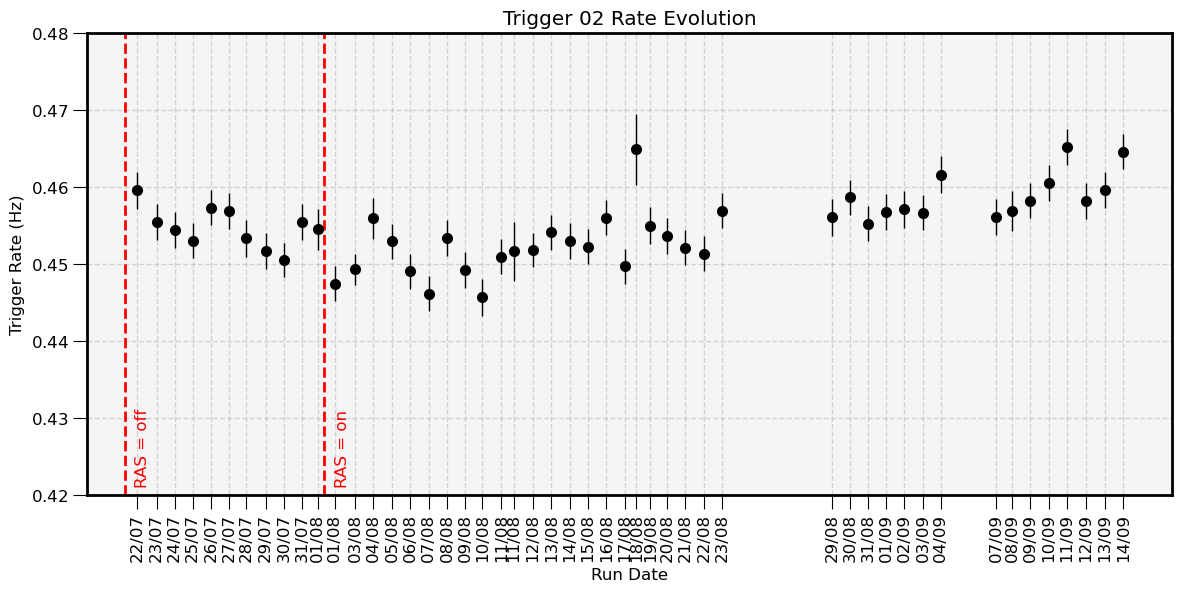

In [32]:
# Global
Date     = []
Date_err = []
Rate     = []
Rate_err = []
Run_numbers = []

for run_id, entry in runs_info.items():
    
    # Run information
    run_long = entry["duration"]
    run_OK   = entry["OK"]
    run_LOST = entry["LOST"]

    Run_numbers.append(run_id)

    # Date + error for each run
    Date.append(EXTRA_INFO_DF.loc[run_id, 'Date_CV'])
    Date_err.append(EXTRA_INFO_DF.loc[run_id, 'Date_Err'])
    
    # Real rate + error for each run
    run_trigg = run_OK + run_LOST
    rate_CV   = run_trigg / run_long
    Rate.append(rate_CV)
    rate_err = np.sqrt(run_trigg) / run_long
    Rate_err.append(rate_err)

# ----- Plotting ---- #
fig, ax = plt.subplots(figsize=(14, 6))

# Data
plt.errorbar(Date, Rate, xerr=Date_err, yerr=Rate_err, fmt='o', c='black', ecolor='black')
# for x, y, run_id in zip(Date, Rate, Run_numbers):
#     plt.text(x, y, str(run_id), fontsize=8, ha='left', va='bottom', color='blue')       # Run number near the point

# Important dates
x_date = 5e4; y_date = 0.421
plt.axvline(x=CC_02, color='red', ls='--', lw=2.0)
plt.text(CC_02+x_date, y_date, 'RAS = off', color='red', ha='left', va='bottom', rotation=90)
plt.axvline(x=CC_RAS_02, color='red', ls='--', lw=2.0)
plt.text(CC_RAS_02+x_date, y_date, 'RAS = on', color='red', ha='left', va='bottom', rotation=90)

# ----- Styling ----- #
plt.xlabel('Run Date')
x_labels = [crudo.epoch_converter(t, h=False) for t in Date]        # Convert x-axis bin edges to readable time format
plt.xticks(Date, x_labels, ha='center', rotation=90)
plt.ylabel('Trigger Rate (Hz)')
plt.ylim(0.42, 0.48)
# plt.ticklabel_format(axis='y', style='sci', scilimits=(-2, -2))
plt.title('Trigger 02 Rate Evolution')

plt.grid(True)
plt.gca().set_facecolor("whitesmoke")
plt.show()

# Reconstructed Rate

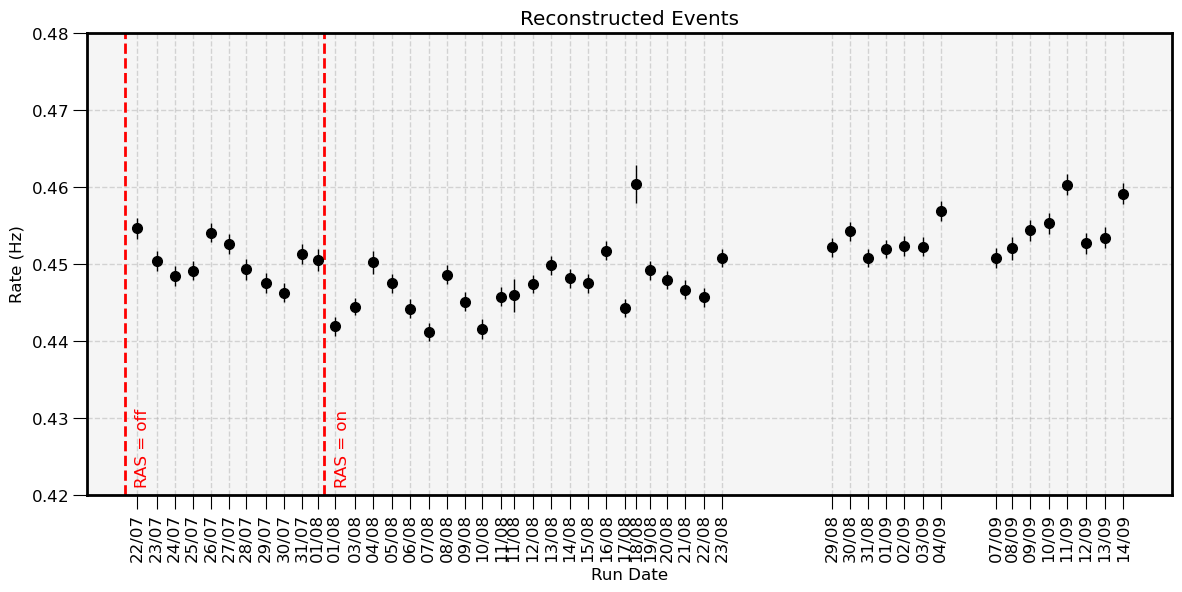

In [33]:
# Global
Date     = []
Date_err = []
Rate     = []
Rate_err = []
Run_numbers = []

for run_id, entry in runs_info.items():
    
    # Run information
    run_long = entry["duration"]
    run_OK   = entry["OK"]
    run_LOST = entry["LOST"]

    Run_numbers.append(run_id)

    # DAQe efficiency + error
    DAQe_CV, DAQe_error = ff.efficiency(run_OK, run_LOST)

    # Date + error for each run
    Date.append(EXTRA_INFO_DF.loc[run_id, 'Date_CV'])
    Date_err.append(EXTRA_INFO_DF.loc[run_id, 'Date_Err'])

    # Reco events
    reco_evts  = EXTRA_INFO_DF.loc[run_id, 'Reco_CV'];  reco_evts = int(reco_evts)
    reco_CV, reco_var = scipy.stats.binom.stats(n=runs_info[run_id]['OK'], p=reco_evts/runs_info[run_id]['OK'], moments='mv')
    
    # Reco rate + error for each run
    rate_CV  = reco_CV / (run_long * DAQe_CV)
    rate_err = rate_CV * np.sqrt((np.sqrt(reco_var) / reco_CV)**2 + (DAQe_error / DAQe_CV)**2)
    Rate.append(rate_CV)
    Rate_err.append(rate_err)                                  

# ----- Plotting ---- #
fig, ax = plt.subplots(figsize=(14, 6))

# Data
plt.errorbar(Date, Rate, xerr=Date_err, yerr=Rate_err, fmt='o', c='black', ecolor='black')
# for x, y, run_id in zip(Date, Rate, Run_numbers):
#     plt.text(x, y, str(run_id), fontsize=8, ha='left', va='bottom', color='blue')       # Run number near the point

# Important dates
x_date = 5e4; y_date = 0.421
plt.axvline(x=CC_02, color='red', ls='--', lw=2.0)
plt.text(CC_02+x_date, y_date, 'RAS = off', color='red', ha='left', va='bottom', rotation=90)
plt.axvline(x=CC_RAS_02, color='red', ls='--', lw=2.0)
plt.text(CC_RAS_02+x_date, y_date, 'RAS = on', color='red', ha='left', va='bottom', rotation=90)

# ----- Styling ----- #
plt.xlabel('Run Date')
x_labels = [crudo.epoch_converter(t, h=False) for t in Date]        # Convert x-axis bin edges to readable time format
plt.xticks(Date, x_labels, ha='center', rotation=90)
plt.ylabel('Rate (Hz)')
plt.ylim(0.42, 0.48)
# plt.legend(loc='upper right', fontsize=9)
plt.title('Reconstructed Events')

plt.grid(True)
plt.gca().set_facecolor("whitesmoke")
plt.show()

# Fiducial Rate

In [5]:
# Global
Date     = []
Date_err = []
Rate     = []
Rate_err = []
Run_numbers = []

FIDUCIAL_EFF_STD = 0.0082       # Standard fiducial efficiency for correction

def const_func(x, a):
    return ff.linear_func(x, 0, a)

for run_id, entry in runs_info.items():

    # print(f"--- Processing Run {run_id} ---")

    # Run information
    run_long = entry["duration"]
    run_OK   = entry["OK"]
    run_LOST = entry["LOST"]

    Run_numbers.append(run_id)

    # DAQe efficiency + error
    DAQe_CV, DAQe_error = ff.efficiency(run_OK, run_LOST)

    # Date + error for each run
    Date.append(EXTRA_INFO_DF.loc[run_id, 'Date_CV'])
    Date_err.append(EXTRA_INFO_DF.loc[run_id, 'Date_Err'])

    # Fiducial events
    fidu_evts  = EXTRA_INFO_DF.loc[run_id, 'nElectron_Fiducial'];    fidu_evts = int(fidu_evts)
    fidu_CV, fidu_var = scipy.stats.binom.stats(n=run_OK, p=fidu_evts/run_OK, moments='mv')
    # print(f'  Fiducial Events = {fidu_CV:.2f}, Var = {fidu_var:.2f}, Duration = {run_long} s, DAQe = {DAQe_CV:.4f} ± {DAQe_error:.4f}')

    # ----- Rate Correction ----- #
    if run_id in [15655, 15656, 15657, 15658, 15659]:
        
        eff_fid, eff_err = ff.efficiency(fidu_CV, run_OK - fidu_CV)    # Fiducial efficiency + error
        corr_factor = FIDUCIAL_EFF_STD / eff_fid
        print(f'Run {run_id} - Correction Factor = {corr_factor:.4f}')

    else:
        corr_factor = 1.0

    fidu_CV  *= corr_factor
    fidu_var *= corr_factor**2
    
    # Fiducial rate + error for each run
    rate_CV  = fidu_CV / (run_long * DAQe_CV)
    rate_err = rate_CV * np.sqrt((np.sqrt(fidu_var) / fidu_CV)**2 + (DAQe_error / DAQe_CV)**2)
    Rate.append(rate_CV * 1e3)
    Rate_err.append(rate_err * 1e3)
    # print(f'  Rate = {rate_CV:.4f} ± {rate_err:.4f} mHz\n')

Run 15655 - Correction Factor = 1.3811
Run 15656 - Correction Factor = 1.1817
Run 15657 - Correction Factor = 1.1030
Run 15658 - Correction Factor = 1.1252
Run 15659 - Correction Factor = 1.0821


In [6]:
# Global
PERIODS = ['RAS off', 'RAS on']
X_FIT = []
Y_FIT = []

# ----- Linear Fits ----- #
# Preliminary
Date     = np.array(Date)
Date_err = np.array(Date_err)
Rate     = np.array(Rate)
Rate_err = np.array(Rate_err)

for i, period in enumerate(PERIODS):

       if period == 'RAS off':
              print(f"--- Fitting Period: Castle = closed & RAS = off ---")
              # Masking: select specific data
              masking_time = (Date >= CC_02) & (Date < CC_RAS_02)
       elif period == 'RAS on':
              print(f"--- Fitting Period: Castle = closed & RAS = on ---")
              # Masking: select specific data
              masking_time = (Date >= CC_RAS_02)       # Just fit data for purest conditions

       x_data = Date[masking_time]
       y_data = Rate[masking_time]
       y_err  = Rate_err[masking_time]

       # Shifted time
       x_shift = (x_data - x_data[0]) / 3600   # In [hr] for numeric stability

       # Define the cost function + initial guess
       least_squares = LeastSquares(x_shift, y_data, y_err, const_func)
       init_guess = [y_data.min()]

       # Define the Minuit object
       m = Minuit(least_squares, *init_guess)

       # Minimization process of the cost function and error estimation
       m.migrad()
       m.hesse()

       # Results
       popt = m.values;  perr = m.errors
       print(f"Rate of Fiducial Background: ({popt[0]:.2f} ± {perr[0]:.2f}) mHz")

       # Reduced chi-square
       chi2 = m.fval
       ndof = len(x_shift) - m.nfit
       p_value = scipy.stats.chi2.sf(chi2, ndof)
       print(f"χ² / ndof = {chi2 / ndof:.2f}\n"
              f"p-value = {p_value:.2f}\n")

       # Fits
       X_FIT.append((x_shift * 3600) + x_data[0])  # In [s]
       Y_FIT.append(const_func(x_shift, *popt))

--- Fitting Period: Castle = closed & RAS = off ---
Rate of Fiducial Background: (4.91 ± 0.08) mHz
χ² / ndof = 0.89
p-value = 0.54

--- Fitting Period: Castle = closed & RAS = on ---
Rate of Fiducial Background: (3.70 ± 0.03) mHz
χ² / ndof = 1.09
p-value = 0.30



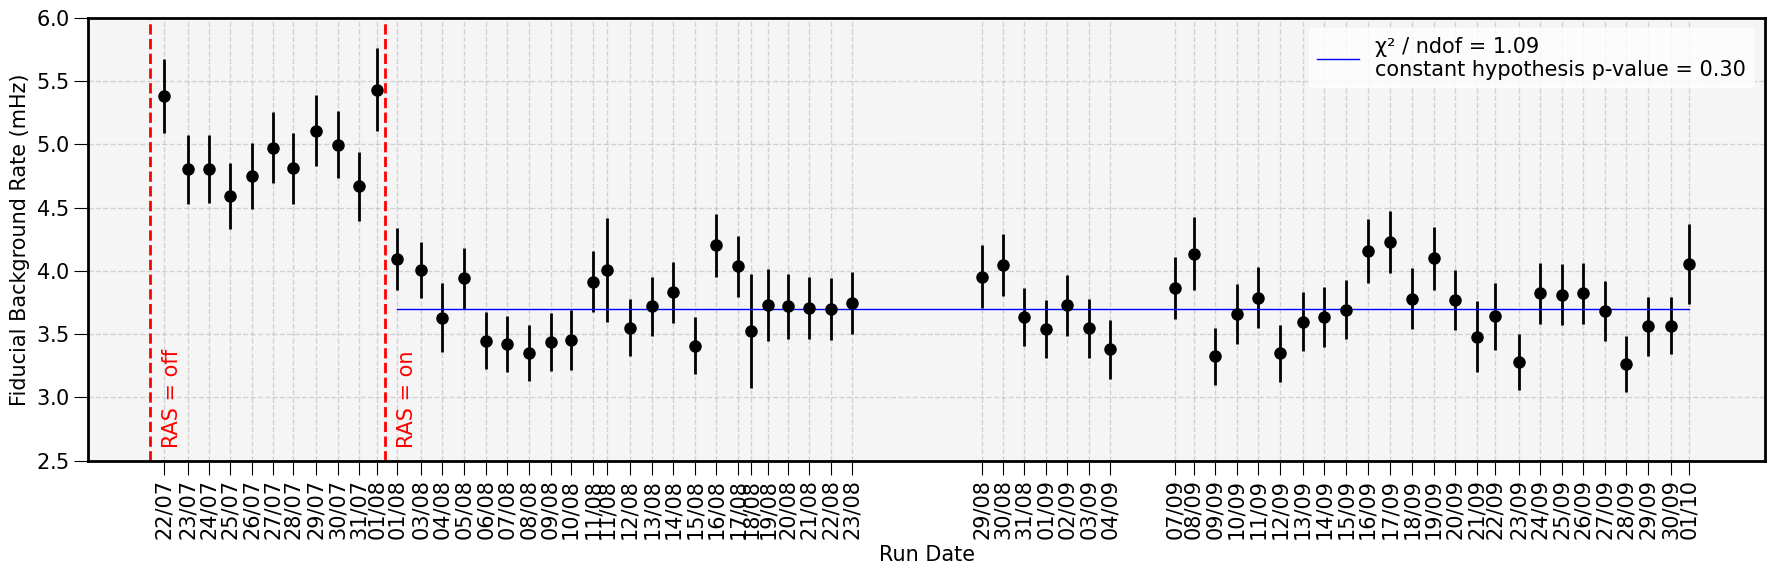

In [ ]:
# ----- Plotting ---- #
fig, ax = plt.subplots(figsize=(18, 6))

# Data
plt.errorbar(Date, Rate, xerr=Date_err, yerr=Rate_err, fmt='o', c='black', ecolor='black')
# for x, y, run_id in zip(Date, Rate, Run_numbers):
#     plt.text(x, y, str(run_id), fontsize=8, ha='left', va='bottom', color='blue')       # Run number near the point

# Fits
# plt.plot(X_FIT[0], Y_FIT[0], color='green', ls='-', label=f'RAS = off')
plt.plot(X_FIT[1], Y_FIT[1], color='blue', ls='-', lw=1.0, label=f'χ² / ndof = {chi2 / ndof:.2f}\nconstant hypothesis p-value = {p_value:.2f}')

# Important dates
x_date = 5e4; y_date = 2.6
plt.axvline(x=CC_02, color='red', ls ='--', lw=2.0)
plt.text(CC_02+x_date, y_date, 'RAS = off', color='red', ha='left', va='bottom', rotation=90)
plt.axvline(x=CC_RAS_02, color='red', ls ='--', lw=2.0)
plt.text(CC_RAS_02+x_date, y_date, 'RAS = on', color='red', ha='left', va='bottom', rotation=90)

# ----- Styling ----- # 
# Preliminary logo
# LOGO_BOX    = OffsetImage(PRELIM_LOGO, zoom = 0.1)
# xy = (Date.max(), Rate.max())
# ab = AnnotationBbox(LOGO_BOX, xy, xybox=(-50, 40), xycoords='data', boxcoords="offset points",  frameon=False)
# ax.add_artist(ab)

plt.xlabel('Run Date')
x_labels = [crudo.epoch_converter(t, h=False) for t in Date]        # Convert x-axis bin edges to readable time format
plt.xticks(Date, x_labels, ha='center', rotation=90)
plt.ylabel('Fiducial Background Rate (mHz)')
plt.ylim(2.5, 6.0)
plt.legend(loc='upper right')

plt.grid(True)
plt.gca().set_facecolor("whitesmoke")
# plt.savefig(f'/lhome/ific/c/ccortesp/Analysis/NEXT-100/Backgrounds/images/Fiducial_Rate_Evolution.pdf')
plt.tight_layout()
plt.show()

# Efficiencies

In [9]:
# PERFORMED_CUTS = ['Reco_CV', 'After_Zneg', 'nS1_0', 'nS1_1', 'nS1_NOPolike', 'After_S1', 'After_S2', 'nElectron', 'Clean_nElectron', 'nElectron_Trg2', 'nElectron_Fiducial']
PERFORMED_CUTS = ['Reco_CV', 'After_Zneg', 'After_S1', 'After_S2', 'nElectron', 'Clean_nElectron', 'nElectron_Trg2', 'nElectron_Fiducial']

CUTS_VERBOSITY = [
                    'IC reconstruction', 
                    'Z negative removal', 
                    'S1 ≤ 1', 
                    'S2 = 1', 
                    'E ≤ 3 MeV', 
                    'Cleaning spurious hits', 
                    'E ≥ 0.5 MeV (Trigger 2)', 
                    'Fiducial selection'
                ]

In [10]:
EXTRA_INFO_DF

,duration,Date_CV,Date_Err,OK,LOST,Reco_CV,After_Zneg,nS1_0,nS1_1,nS1_NOPolike,...,nElectron_Tube,nElectron_Anode,nElectron_Cathode,nAlpha,Clean_nAlpha,nAlpha_Trg2,nAlpha_Fiducial,nAlpha_Tube,nAlpha_Anode,nAlpha_Cathode
Run_ID,,,,,,,,,,,,,,,,,,,,,
15609,79563,1.753150e+09,178.5054,28168,8392,27865,20667,2139,17560,15564,...,6926,992,834,4566,4566,4541,1009,530,104,2898
15614,81279,1.753243e+09,184.9919,28543,8472,28225,20811,2232,17470,15432,...,6845,964,828,4425,4424,4408,950,509,115,2834
15615,86302,1.753328e+09,189.7897,30165,9046,29767,21927,2436,18414,16198,...,7074,1104,880,4714,4713,4680,1030,604,125,2921
15616,86146,1.753414e+09,189.6876,30386,8635,30124,22198,2414,18742,16505,...,7178,1060,895,4902,4901,4876,1014,640,145,3077
15617,88041,1.753502e+09,189.1545,31274,8983,31052,22945,2534,19324,17057,...,7541,1114,915,4919,4918,4896,1012,589,139,3156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15733,86919,1.758939e+09,193.8304,30475,10027,30144,22120,2437,18639,16226,...,7054,1060,857,4549,4549,4527,916,547,147,2917
15734,85790,1.759026e+09,195.0733,29837,9598,29513,21813,2406,18158,15869,...,6863,1010,834,4442,4439,4414,852,546,113,2903
15735,87451,1.759113e+09,194.4310,30547,9958,30193,22198,2495,18665,16315,...,7100,1008,860,4526,4525,4505,868,534,145,2958


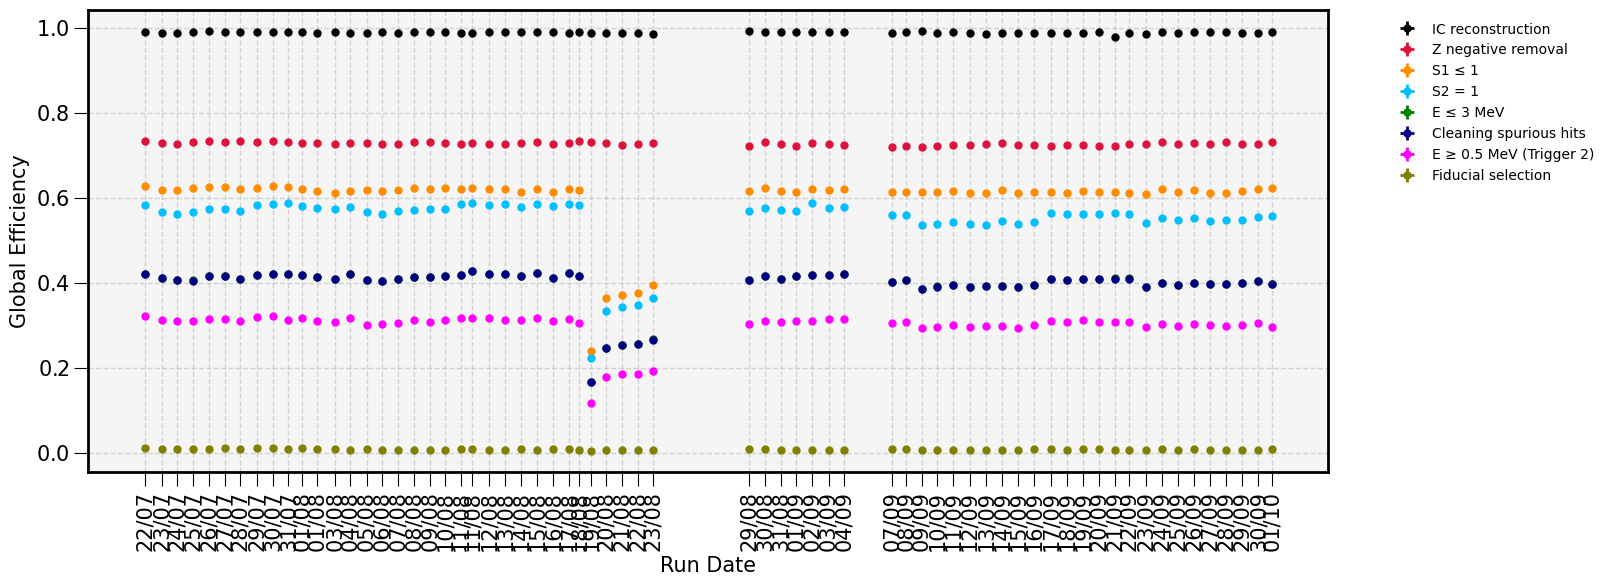

In [11]:
# Global
fig, ax = plt.subplots(figsize=(16, 6))

for i, cut in enumerate(PERFORMED_CUTS):

    # Storage
    Date_CV = [];      Date_Err = []
    Cut_CV  = [];      Cut_Err  = []

    Run_numbers = []

    for run_id, entry in runs_info.items():

        # Run information
        run_long = entry["duration"]
        run_OK   = entry["OK"]
        run_LOST = entry["LOST"]

        Run_numbers.append(run_id)

        # Date + error for each run
        Date_CV.append(EXTRA_INFO_DF.loc[run_id, 'Date_CV'])
        Date_Err.append(EXTRA_INFO_DF.loc[run_id, 'Date_Err'])

        # Global efficiency
        after_cut_evts = EXTRA_INFO_DF.loc[run_id, cut]
        after_cut_CV, after_cut_error = ff.efficiency(after_cut_evts, run_OK - after_cut_evts)
        Cut_CV.append(after_cut_CV);  
        Cut_Err.append(after_cut_error)

    # ----- Plotting ----- #
    # Data
    plt.errorbar(Date_CV, Cut_CV, xerr=Date_Err, yerr=Cut_Err, 
                 fmt='o', ms=5, c=pt.hist_colors[i % len(pt.hist_colors)], 
                 ecolor=pt.hist_colors[i % len(pt.hist_colors)], label=CUTS_VERBOSITY[i])
    
    # if i == 0:
    #     for x, y, run_id in zip(Date_CV, Cut_CV, Run_numbers):
    #         plt.text(x, 1.005*max(Cut_CV), str(run_id), fontsize=8, ha='center', va='bottom', color='blue')       # Run number near the point
    # else:
    #     continue

    # Xticks
    x_labels = [crudo.epoch_converter(t, h=False) for t in Date_CV]        # Convert x-axis bin edges to readable time format
    plt.xticks(Date_CV, x_labels, ha='center', rotation=90)

# ----- Styling ----- #
plt.xlabel('Run Date')
plt.ylabel('Global Efficiency')
# plt.ylim(0.4, 0.42)
plt.legend(loc='upper right', bbox_to_anchor=(1.225, 1), fontsize=10)

plt.grid(True)
plt.gca().set_facecolor("whitesmoke")
plt.show()

## Relative

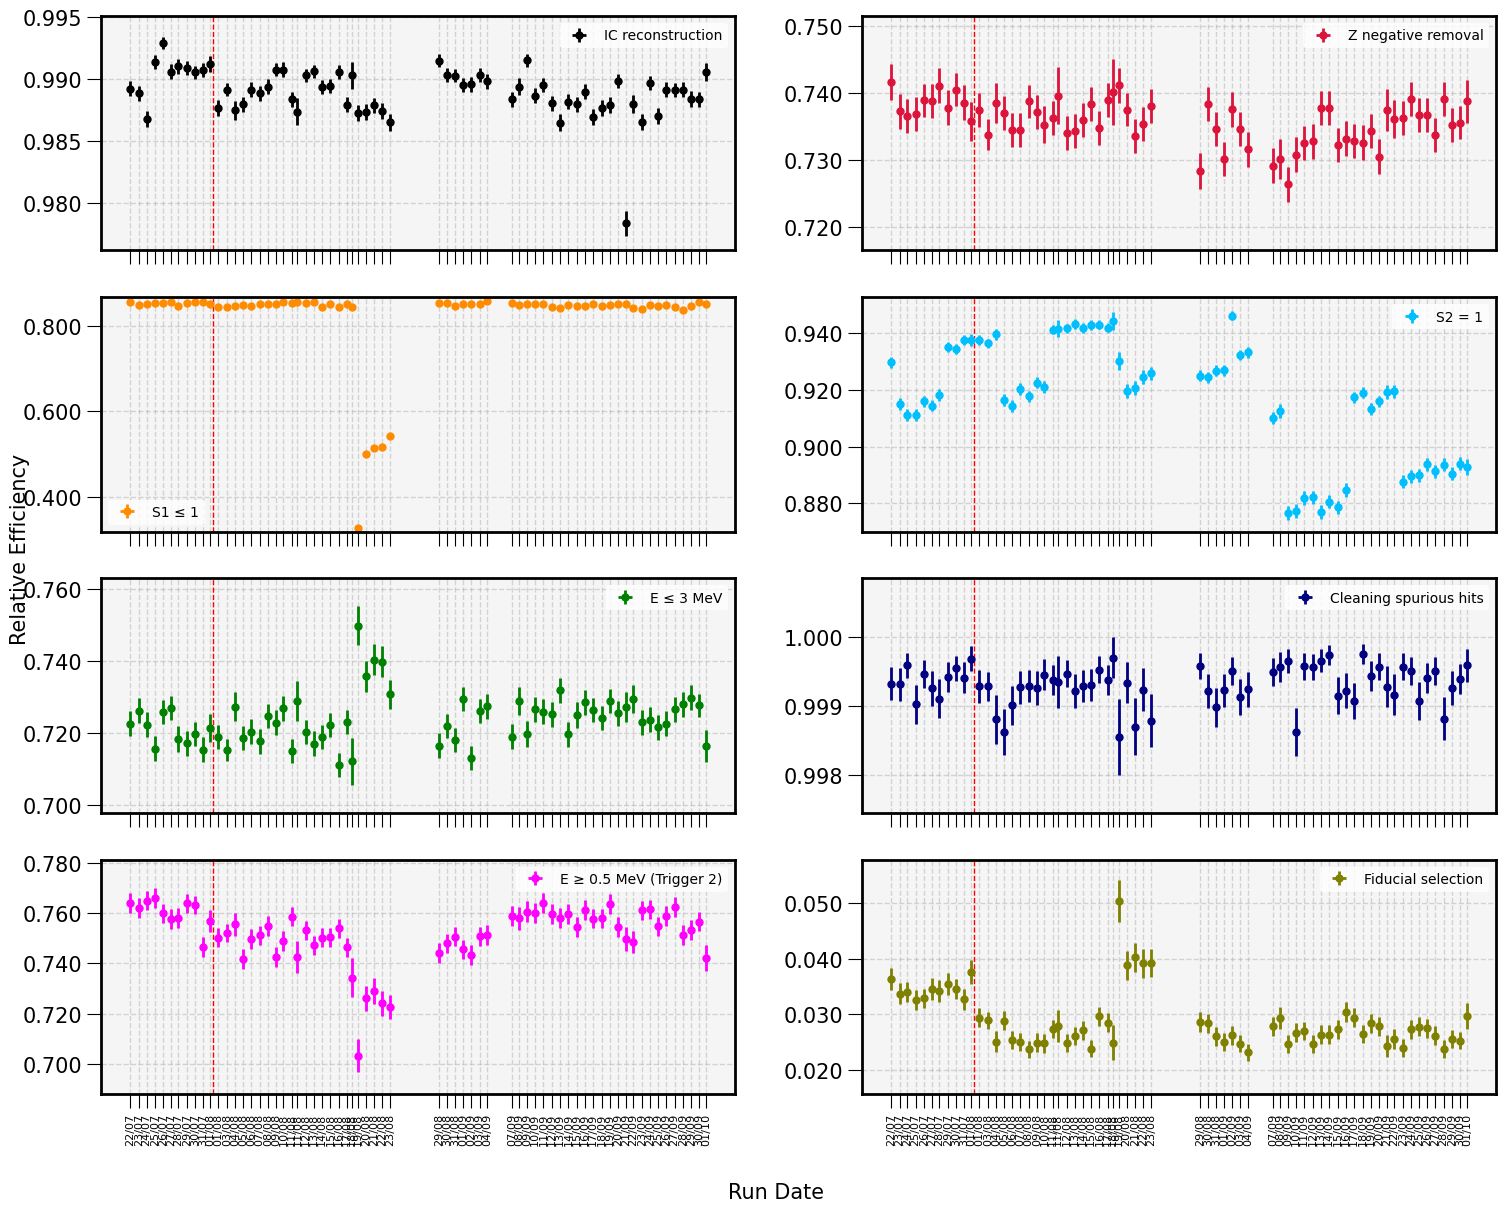

In [12]:
# Global
fig, ax = plt.subplots(nrows=4, ncols=2, sharex=True, figsize=(18, 14))

for i, cut in enumerate(PERFORMED_CUTS):

    # Storage
    Date_CV = [];      Date_Err = []
    Cut_CV  = [];      Cut_Err  = []

    Run_numbers = []

    for run_id, entry in runs_info.items():

        # Run information
        run_long = entry["duration"]
        run_OK   = entry["OK"]
        run_LOST = entry["LOST"]

        Run_numbers.append(run_id)

        # Date + error for each run
        Date_CV.append(EXTRA_INFO_DF.loc[run_id, 'Date_CV'])
        Date_Err.append(EXTRA_INFO_DF.loc[run_id, 'Date_Err'])

        # Global efficiency
        if i == 0:
            before_cut_evts = run_OK
        else:
            before_cut_evts = EXTRA_INFO_DF.loc[run_id, PERFORMED_CUTS[i-1]]

        after_cut_evts  = EXTRA_INFO_DF.loc[run_id, cut]
        after_cut_CV, after_cut_error = ff.efficiency(after_cut_evts, before_cut_evts - after_cut_evts)
        Cut_CV.append(after_cut_CV);  
        Cut_Err.append(after_cut_error)

    # ----- Plotting ----- #
    # Data
    ax[i//2, i%2].errorbar(Date_CV, Cut_CV, xerr=Date_Err, yerr=Cut_Err, 
                 fmt='o', ms=5, c=pt.hist_colors[i % len(pt.hist_colors)], 
                 ecolor=pt.hist_colors[i % len(pt.hist_colors)], label=CUTS_VERBOSITY[i])
    
    # Important dates
    ax[i//2, i%2].axvline(x=CC_RAS_02, color='red', ls ='--', lw=1.0)       # RAS = on

    # ----- Styling ----- #
    x_labels = [crudo.epoch_converter(t, h=False) for t in Date_CV]         # Convert x-axis bin edges to readable time format
    ax[i//2, i%2].set_xticks(Date_CV)
    ax[i//2, i%2].set_xticklabels(x_labels, ha='center', rotation=90, fontsize=8)
    min_y = min(Cut_CV) - (2 * np.max(Cut_Err));  max_y = max(Cut_CV) + (2 * np.max(Cut_Err))
    # if cut == 'After_S1':
    #     min_y = min(Cut_CV)-2*np.max(Cut_Err);  max_y = max(Cut_CV)+2*np.max(Cut_Err)
    #     # min_y = min(Cut_CV) - 0.05;  max_y = max(Cut_CV) + 0.05
    # else:
    #     min_y = min(Cut_CV)-2*np.max(Cut_Err);  max_y = max(Cut_CV)+2*np.max(Cut_Err)
    ax[i//2, i%2].set_ylim(min_y, max_y)
    ax[i//2, i%2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))
    ax[i//2, i%2].legend(loc='best', fontsize=10)

    ax[i//2, i%2].grid(True)
    ax[i//2, i%2].set_facecolor("whitesmoke")

fig.text(0.5, 0.04, 'Run Date', ha='center', va='center', fontsize=15)
fig.text(0.08, 0.5, 'Relative Efficiency', ha='center', va='center', rotation=90, fontsize=15)
plt.show()

## Fiducial Cut

There were some runs with affectation in their $S1$ cut efficiency, namely:
- 15655, 15656, 15657, 15658, 15659
<!-- end of the list -->
We re-escale their fiducial rate by the difference with the "usual" fiducial cut efficiency.

In [ ]:
# Storage
Date_CV = [];      Date_Err = []
Eff_CV  = [];      Eff_Err  = []
Run_numbers = []

CUT_INTEREST = 'nElectron_Fiducial'     # 'After_S1'

for run_id, entry in runs_info.items():

    # Skip baddies
    if run_id in [15655, 15656, 15657, 15658, 15659]:
        continue

    # Run information
    run_long = entry["duration"]
    run_OK   = entry["OK"]
    run_LOST = entry["LOST"]

    Run_numbers.append(run_id)

    # Date + error for each run
    date_CV = EXTRA_INFO_DF.loc[run_id, 'Date_CV']
    # Just use RAS = on period
    if date_CV < CC_RAS_02:
        continue
    Date_CV.append(date_CV)
    Date_Err.append(EXTRA_INFO_DF.loc[run_id, 'Date_Err'])

    # Global efficiency
    after_S1_evts = EXTRA_INFO_DF.loc[run_id, CUT_INTEREST]
    after_cut_CV, after_cut_error = ff.efficiency(after_S1_evts, run_OK - after_S1_evts)
    Eff_CV.append(after_cut_CV);  
    Eff_Err.append(after_cut_error)

In [56]:
# ----- Constant Fit ----- #
def const_func(x, b):
    return ff.linear_func(x, 0, b)

# Preliminary
Date_CV  = np.array(Date_CV)
Date_Err = np.array(Date_Err)
Eff_CV   = np.array(Eff_CV)
Eff_Err  = np.array(Eff_Err)

# Define the cost function
least_squares = LeastSquares(Date_CV, Eff_CV, Eff_Err, const_func)

# Define the Minuit object with inital guesses for the parameters
m = Minuit(least_squares, b=0)

# Minimization process of the cost function and error estimation
m.migrad()
m.hesse()

# Reduced chi-square
chi2 = m.fval
ndof = len(Date_CV) - m.nfit
p_value = scipy.stats.chi2.sf(chi2, ndof)

print (f"Fit results:\n"
       f"  b = {m.values['b']:.4f} ± {m.errors['b']:.4f}\n"
       f"χ² / ndof = {chi2:.2f} / {ndof:.2f} = {chi2 / ndof:.2f}\n"
       f"p-value = {p_value:.2f}")

Fit results:
  b = 0.0081 ± 0.0001
χ² / ndof = 38.94 / 32.00 = 1.22
p-value = 0.19


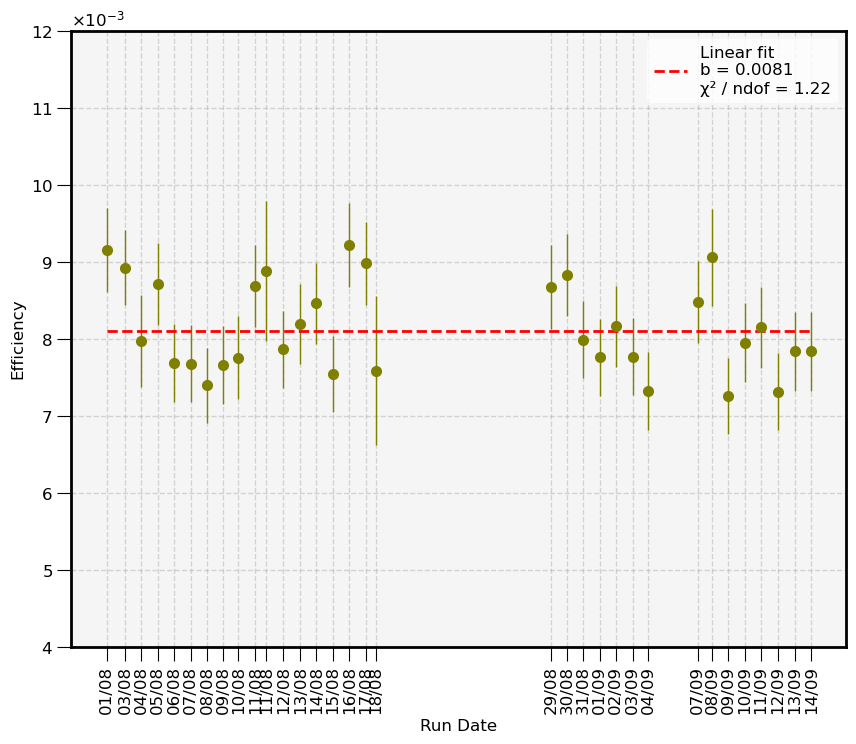

In [66]:
# ----- Plotting ----- #
# Data
plt.errorbar(Date_CV, Eff_CV, xerr=Date_Err, yerr=Eff_Err, fmt='o', c=pt.hist_colors[7], ecolor=pt.hist_colors[7])
# for x, y, run_id in zip(Date_CV, Eff_CV, Run_numbers):
#     plt.text(x, 1.005*max(Eff_CV), str(run_id), fontsize=8, ha='center', va='bottom', color='blue')       # Run number near the point

# Fit
y_fit = const_func(Date_CV, m.values['b'])
plt.plot(Date_CV, y_fit, color='red', ls='--', lw=2.0, label=f"Linear fit\nb = {m.values['b']:.4f}\nχ² / ndof = {chi2 / ndof:.2f}")

# ----- Styling ----- #
plt.xlabel('Run Date')
x_labels = [crudo.epoch_converter(t, h=False) for t in Date_CV]        # Convert x-axis bin edges to readable time format
plt.xticks(Date_CV, x_labels, ha='center', rotation=90)
plt.ylabel('Efficiency')
plt.ylim(4e-3, 12e-3)
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, -3))
plt.legend(loc='upper right')

plt.grid(True)
plt.gca().set_facecolor("whitesmoke")
plt.show()